In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import tick_goodness_of_fit

In [19]:
negativeAppleTweets = pd.read_csv('datasets/techTweets/negativeAppleTweets.csv')
negativeAppleTweets.drop(columns=['Unnamed: 0'], inplace=True)
negativeAppleTweets = negativeAppleTweets.drop_duplicates(subset='post_date', keep="last")
negativeAppleTweets.sort_values('post_date', inplace=True)
negativeAppleTweets.head()
negativeAppleTweets.shape

(2163, 9)

[0.00000000e+00 1.20363000e+00 2.03453000e+00 ... 1.57276904e+03
 1.57391401e+03 1.57465579e+03]


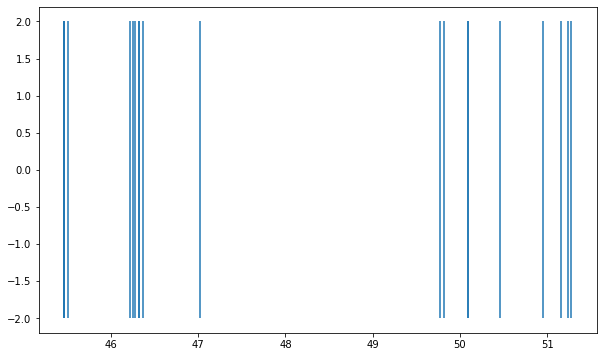

In [25]:
timestamps = negativeAppleTweets['post_date'].to_numpy()
timestamps= np.array(timestamps, dtype = float)
timestamps -= np.min(timestamps)
timestamps /= 10e4
print(timestamps)

fig, ax = plt.subplots(figsize=(10,6))
ax.vlines(timestamps[100:120],ymin=-2,ymax=2)

plt.show()

fig.savefig("figures/timestamps_tweets.png", bbox_inches="tight")

In [4]:
from tick.plot import plot_hawkes_kernels
from tick.hawkes import HawkesEM, SimuHawkes, HawkesExpKern

learner = HawkesEM(2, kernel_size=800,tol=10e-5)
learner_exp = HawkesExpKern(decays=0.3)
learner_exp.fit([timestamps])
learner.fit([timestamps])
print(learner.score())

0.9134372167456114


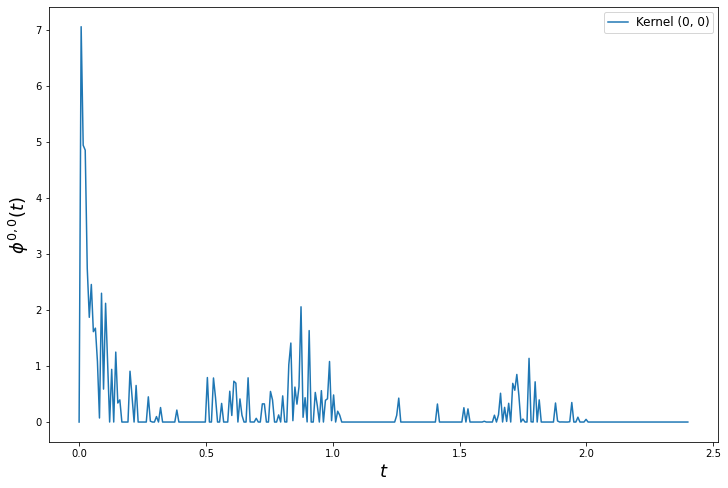

In [5]:
fig = plot_hawkes_kernels(learner, show=False)
fig.set_size_inches(12, 8)

plt.show()

fig.savefig("figures/kernel.png", bbox_inches="tight")

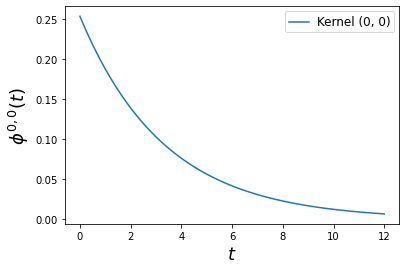

In [6]:
fig = plot_hawkes_kernels(learner_exp, show=False)

plt.show()

In [7]:
from scipy import integrate

residualsnp = tick_goodness_of_fit.goodness_of_fit_nonpar(learner, [timestamps], 0.0001, integrate.simps)

Kernel [0, 0] set.


KstestResult(statistic=0.014122827358510892, pvalue=0.7760226656182803)


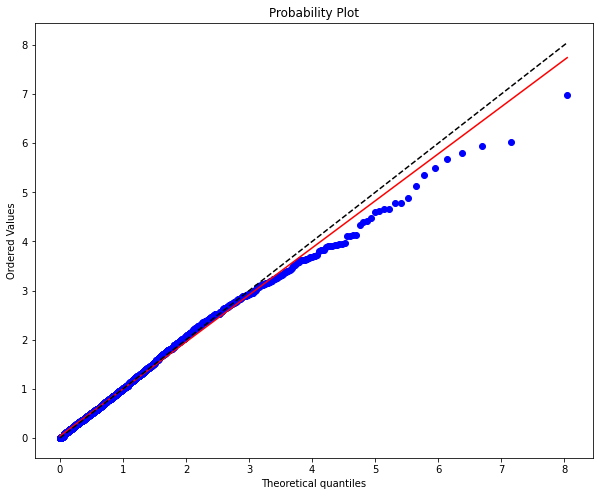

In [8]:
fig = tick_goodness_of_fit.plot_resid(residualsnp,1,1)

fig.savefig("figures/prob_plot.png", bbox_inches="tight")

In [18]:
print(learner.baseline)

[0.41113337]
